# Exploratory Data Analysis
**Author:** Gaurav Singh Rathore

This notebook performs exploratory data analysis (EDA) on the cleaned sales dataset.
It includes data loading, summary statistics, and visualizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,5)

In [4]:
# Load cleaned dataset
df = pd.read_csv(r'C:\Users\shali\Desktop\Gaurav\analysis\sales1.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,shipping duration,Year,Month,Day
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,2016,11,8
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,2016,11,8
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,2016,6,12
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,2015,10,11
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,2015,10,11


In [5]:
# Dataset Information
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Row ID              9994 non-null   int64  
 1   Order ID            9994 non-null   str    
 2   Order Date          9994 non-null   str    
 3   Ship Date           9994 non-null   str    
 4   Ship Mode           9994 non-null   str    
 5   Customer ID         9994 non-null   str    
 6   Customer Name       9994 non-null   str    
 7   Segment             9994 non-null   str    
 8   Country             9994 non-null   str    
 9   City                9994 non-null   str    
 10  State               9994 non-null   str    
 11  Postal Code         9994 non-null   int64  
 12  Region              9994 non-null   str    
 13  Product ID          9994 non-null   str    
 14  Category            9994 non-null   str    
 15  Sub-Category        9994 non-null   str    
 16  Product Name     

In [6]:
# Summary Statistics
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,shipping duration,Year,Month,Day
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,3.958175,2015.722233,7.809686,15.468481
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,1.747567,1.123555,3.284654,8.748327
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2014.000000,1.000000,1.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,3.000000,2015.000000,5.000000,8.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,4.000000,2016.000000,9.000000,15.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,5.000000,2017.000000,11.000000,23.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,7.000000,2017.000000,12.000000,31.000000


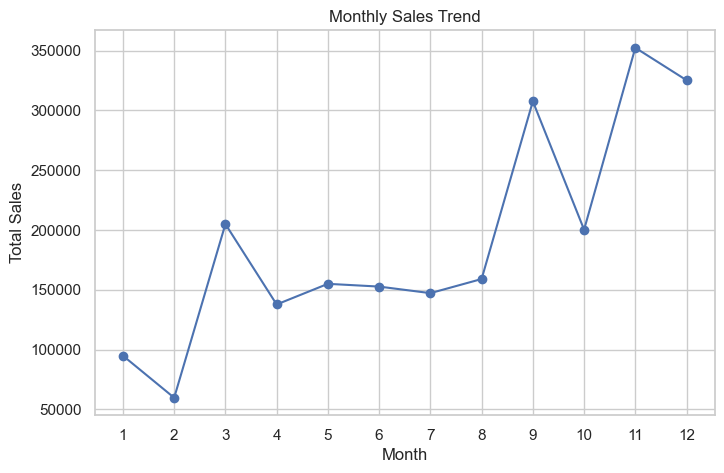

In [7]:
# Monthly Sales Trend
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1,13))
plt.show()

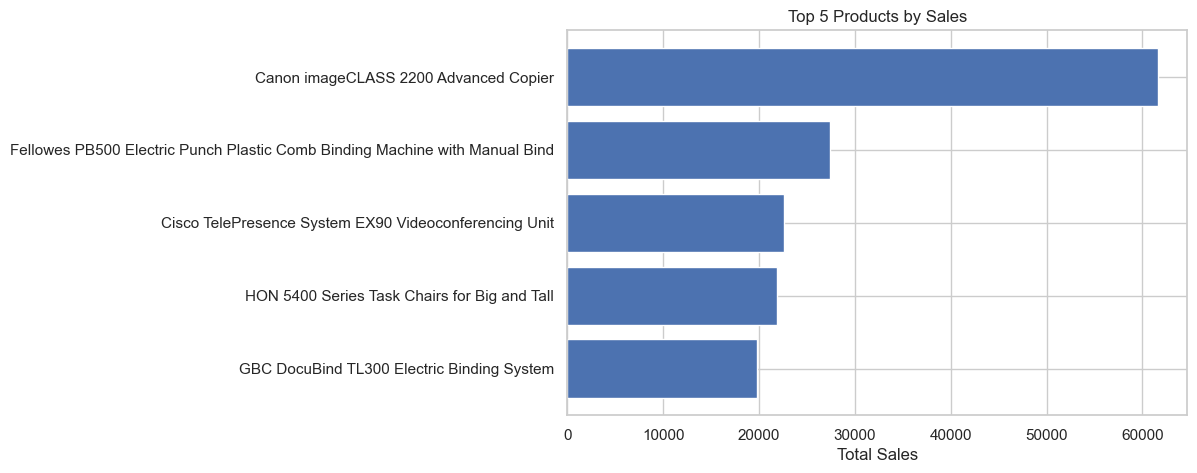

In [8]:
# Top 5 Products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)

plt.barh(top_products.index, top_products.values)
plt.title('Top 5 Products by Sales')
plt.xlabel('Total Sales')
plt.gca().invert_yaxis()
plt.show()

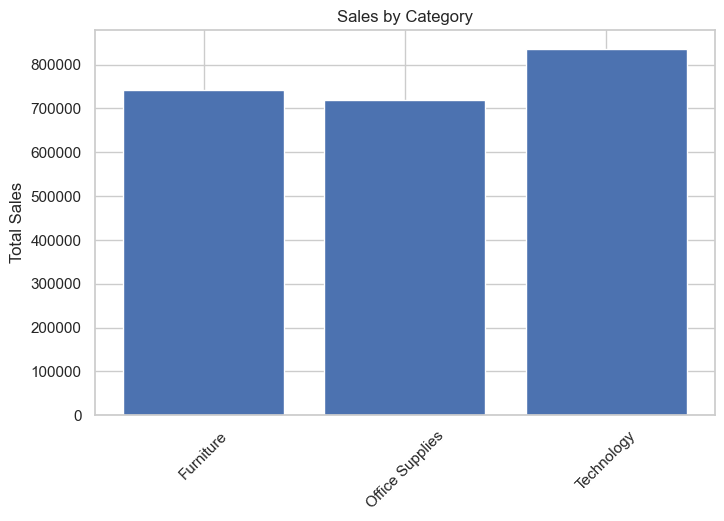

In [9]:
# Sales by Category
category_sales = df.groupby('Category')['Sales'].sum()

plt.bar(category_sales.index, category_sales.values)
plt.title('Sales by Category')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

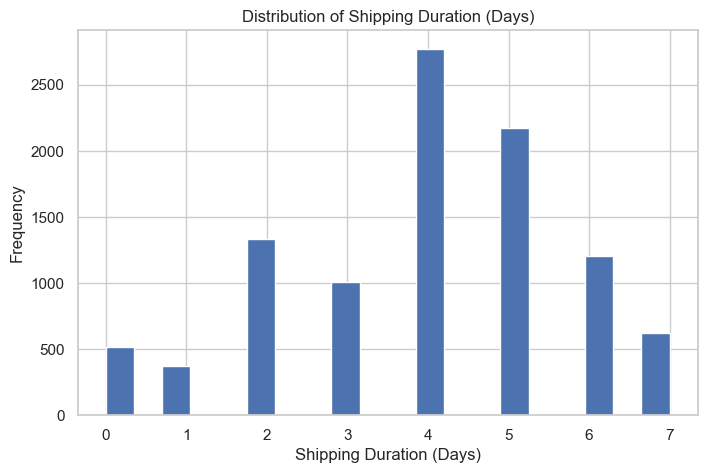

In [20]:
# Shipping Duration Distribution
plt.hist(df['shipping  duration'].dropna(), bins=20)
plt.title('Distribution of Shipping Duration (Days)')
plt.xlabel('Shipping Duration (Days)')
plt.ylabel('Frequency')
plt.show()

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'shipping  duration', 'Year', 'Month', 'Day'],
      dtype='str')


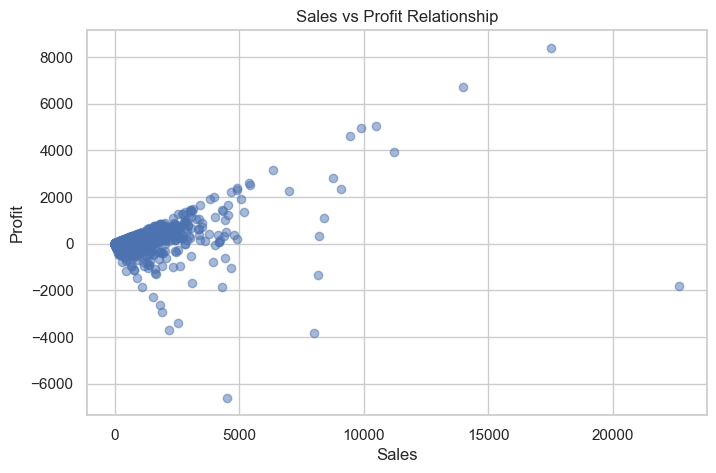

In [19]:
print(df.columns)
# Sales vs Profit Relationship
plt.scatter(df['Sales'], df['Profit'], alpha=0.5)
plt.title('Sales vs Profit Relationship')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()